# Статистика, DS-поток
## Задание S.12

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 50 баллов;
* Задача P2 &mdash; 100 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P1, P2;

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [257]:
# Bot check

# HW_ID: ds_sp11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [258]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

---
### Задача P1.

Напишите класс, реализующий линейную регрессию и ее статистические свойства в условиях гомоскедастичности.

In [259]:
class LinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """

    def __init__(self, fit_intercept=True, alpha=0.05):
        """
        :param fit_intercept: добавлять ли смещение(константный признак)
        :param alpha: уровень значимости критерия,
                      (1-alpha): уровень доверия дов. интервала
        """
        self.fit_intercept = fit_intercept
        self.alpha = alpha

    def fit(self, X, Y):
        """
        Функция обучения модели.

        Предполагается модель Y = X * theta + epsilon,
        где epsilon имеет норм. распр. с параметрами (0, sigma^2 * I_n).

        :param X: регрессор (матрица размера n x d),
        :param Y: отклик (матрица размера n x 1),
        """
        tmp_X = X.copy()

        self.n, self.d = tmp_X.shape

        if self.fit_intercept:
            tmp_X = np.hstack((np.ones((self.n, 1)), X))
            self.d += 1

        self.theta = np.linalg.inv(tmp_X.T @ tmp_X) @ tmp_X.T @ Y
        self.sigma_sq = (
            1
            / (self.n - self.d)
            * (Y - tmp_X @ self.theta).T
            @ (Y - tmp_X @ self.theta)
        )

        t_quantile = sps.t(self.n - self.d).ppf(1 - self.alpha / 2)
        self.conf_int = np.array(
            [
                self.theta
                - np.sqrt(self.sigma_sq * np.linalg.inv(tmp_X.T @ tmp_X).diagonal())
                * t_quantile,
                self.theta
                + np.sqrt(self.sigma_sq * np.linalg.inv(tmp_X.T @ tmp_X).diagonal())
                * t_quantile,
            ]
        )

        self.t_stats = self.theta / np.sqrt(
            self.sigma_sq * np.linalg.inv(tmp_X.T @ tmp_X).diagonal()
        )
        self.t_pvalue = 2 * (1 - sps.t(self.n - self.d).cdf(np.abs(self.t_stats)))
        self.f_stat = (
            (self.n - self.d)
            / self.d
            * np.linalg.norm(tmp_X @ self.theta) ** 2
            / np.linalg.norm(Y - tmp_X @ self.theta) ** 2
        )
        self.f_pvalue = 1 - sps.f(self.d, self.n - self.d).cdf(self.f_stat)

        return self

    def summary(self, feature_names=None, fit_intercept=True):
        """
        Выводит таблицу с информацией для каждого коэффициента,
        в которой указана его оценка, границы дов. интервала,
        статистика критерия и значение p-value.

        :param feature_names: список имен признаков (list[str]).
        :param fit_intercept: bool, если True, добавить строку для Intercept.
        """
        print(f"Линейная регрессия на {self.d} признаках и {self.n} объектах")
        print(f"Sigma: {self.sigma_sq:.6f}")

        # Напечатайте результаты F-теста
        f_df = pd.DataFrame(
            {
                "F-statistic": [self.f_stat.round(4)],
                "f-pvalue": [self.f_pvalue.round(4)],
            }
        )
        display(f_df)

        if feature_names is None:
            feature_names = [f"theta{i}" for i in range(1, len(self.theta))]

        if fit_intercept:
            feature_names = ["Intercept"] + feature_names

        result_df = pd.DataFrame(
            {
                "Feature": feature_names,
                "coef": self.theta.round(4),
                "t": self.t_stats.round(4),
                "P > |t|": self.t_pvalue.round(4),
                "[0.025]": self.conf_int[0, :].round(4),
                "[0.975]": self.conf_int[1, :].round(4),
            }
        )
        display(result_df)

    def predict(self, X, type_interval=None):
        """
        Возвращает предсказание отклика на новых объектах X
        и опционально доверительный/предсказательный интервал.

        :param X: матрица объектов размера n x d
        :param type_interval: тип дов. интервала.
            Для этого параметра возможны три варианта:
            * None - возвратить только предсказание,
                    размер return-a: n;
            * 'confidence' - возвратить предсказание и
                доверительный интервал для среднего отклика,
                размер return-a: n x 3;
            * 'prediction' - возвратить предсказание и
                предсказательный интервал для новых объектов,
                размер return-a: n x 3.

        :return y_pred: предсказание/предсказание и дов./предсказ. инт.

        """
        tmp_X = X
        n, d = X.shape
        if self.fit_intercept:
            tmp_X = np.hstack((np.ones((n, 1)), X))
            d += 1

        pred = tmp_X @ self.theta
        margin = 0
        t_quantile = sps.t(n - d).ppf(1 - self.alpha / 2)

        if type_interval == "confidence":
            margin = (
                t_quantile
                * np.sqrt(
                    self.sigma_sq * tmp_X @ np.linalg.inv(tmp_X.T @ tmp_X) @ tmp_X.T
                ).diagonal()
            )

        elif type_interval == "prediction":
            margin = (
                t_quantile
                * np.sqrt(
                    self.sigma_sq
                    * (1 + tmp_X @ np.linalg.inv(tmp_X.T @ tmp_X) @ tmp_X.T)
                ).diagonal()
            )
        lower_bound = pred - margin
        upper_bound = pred + margin
        result = np.column_stack((pred, lower_bound, upper_bound))
        return result

Примените написанный класс для данных из задания 6 курса Введение в анализ данных и напечатайте `summary`. Предварительно разделите данные на обучающую и тестовую части, выполните необходимые преобразования признаков.

Проверку применимости критериев в данной задаче выполнять не нужно.

In [260]:
data = pd.read_csv('day.csv')[[
    'season', 'mnth', 'holiday', 'weekday', 'workingday', 
    'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'
]]

train, test = train_test_split(data, test_size=0.2, random_state=42)

categorial_features = [
    'season', 'mnth', 'holiday', 
    'weekday', 'workingday', 'weathersit'
]
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
test_cat = encoder.transform(test[categorial_features])

scaler = StandardScaler()
train_real = scaler.fit_transform(train[real_features])
test_real = scaler.transform(test[real_features])

X_train = np.hstack([train_real, train_cat])
y_train = train[target_feature].values

X_test = np.hstack([test_real, test_cat])
y_test = test[target_feature].values

data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Для объектов из тестовой части постройте
* точечные предсказания,
* доверительный интервал для среднего таргета,
* предсказательный интервал для таргета.

Посчитайте, насколько часто истинное значение таргета попадает в построенные интервалы. Можно ли как-то проинтерпретировать это число?

Выведем точечные предсказания

In [262]:
first_lin_reg = LinearRegression(fit_intercept=True)
first_lin_reg.fit(X_train, y_train)

first_lin_reg.summary()

Линейная регрессия на 29 признаках и 584 объектах
Sigma: 6836542.191332


,F-statistic,f-pvalue
0,64.199,0.0


,Feature,coef,t,P > |t|,[0.025],[0.975]
0,Intercept,4088.2638,6.8814,0.0000,2.921295e+03,5.255233e+03
1,theta1,3986.6323,4.4282,0.0000,2.218237e+03,5.755027e+03
2,theta2,-3389.8191,-4.0523,0.0001,-5.032966e+03,-1.746673e+03
3,theta3,-214.0669,-1.3860,0.1663,-5.174392e+02,8.930540e+01
4,theta4,-317.9329,-2.6133,0.0092,-5.569067e+02,-7.895900e+01
5,theta5,1473.5716,1.9989,0.0461,2.552740e+01,2.921616e+03
6,theta6,414.1882,0.4900,0.6243,-1.246071e+03,2.074448e+03
7,theta7,1935.9123,2.6279,0.0088,4.888890e+02,3.382936e+03
8,theta8,168.7543,0.3180,0.7506,-8.736663e+02,1.211175e+03
9,theta9,314.5627,0.4764,0.6340,-9.825180e+02,1.611643e+03


In [263]:
result_conf = first_lin_reg.predict(X_test, type_interval="confidence")
result_pred = first_lin_reg.predict(X_test, type_interval="prediction")

df = pd.DataFrame({
    "Точечное предсказание": result_conf[:, 0],
    "Lower_Confidence": result_conf[:, 1],
    "Upper_Confidence": result_conf[:, 2],
    "Lower_Prediction": result_pred[:, 1],
    "Upper_Prediction": result_pred[:, 2],
})

df.head()

,Точечное предсказание,Lower_Confidence,Upper_Confidence,Lower_Prediction,Upper_Prediction
0,4733.759112,2617.902646,6849.615577,-852.863127,10320.381351
1,4750.702647,2443.659806,7057.745488,-921.183662,10422.588956
2,353.765557,-1801.601481,2509.132596,-5275.057984,5982.589099
3,4130.801301,1968.164651,6293.437950,-1480.468459,9742.071060
4,5686.021367,2868.594760,8503.447975,-214.321162,11586.363897


Подсчитаем долю попаданий

In [264]:
df["y_true"] = y_test

df["In_Confidence_Interval"] = (
    (df["y_true"] >= df["Lower_Confidence"]) & 
    (df["y_true"] <= df["Upper_Confidence"])
)

df["In_Prediction_Interval"] = (
    (df["y_true"] >= df["Lower_Prediction"]) & 
    (df["y_true"] <= df["Upper_Prediction"])
)

confidence_coverage = df["In_Confidence_Interval"].mean()
prediction_coverage = df["In_Prediction_Interval"].mean()

print(f"Доля попаданий в доверительный интервал: {confidence_coverage:.2%}")
print(f"Доля попаданий в предсказательный интервал: {prediction_coverage:.2%}")

Доля попаданий в доверительный интервал: 65.99%
Доля попаданий в предсказательный интервал: 93.20%


Как видим, доля попаданий в доверительный интервал далека от желаемых 95%. Это может говорить о том, что линейная модель плохо применима для предложенных данных.

Хорошо отработал предсказательный интервал, благодаря учету шума мы почти смогли добиться 95%.

Выберите один вещественный признак, для которого отвергается гипотеза о незначимости. Постройте еще раз модель, используя только этот признак, а также константный признак. Нарисуйте график, на котором отметьте
* точки выборки,
* точечные предсказания,
* доверительный и предсказательный интервалы.

В качестве признака, для которого отвергается гипотеза возьмем второй.

In [265]:
tmp_index = 1

second_lin_reg = LinearRegression(fit_intercept=True)
second_lin_reg.fit(X_train[:, tmp_index].reshape(-1, 1), y_train)

second_lin_reg.summary()

Линейная регрессия на 2 признаках и 584 объектах
Sigma: 2237709.305741


,F-statistic,f-pvalue
0,2901.8723,0.0


,Feature,coef,t,P > |t|,[0.025],[0.975]
0,Intercept,4560.9777,73.6822,0.0,4439.4018,4682.5537
1,theta1,1198.1885,19.3566,0.0,1076.6126,1319.7644


In [266]:
result_conf = second_lin_reg.predict(
    X_test[:, tmp_index].reshape(-1, 1), type_interval="confidence"
)
result_pred = second_lin_reg.predict(
    X_test[:, tmp_index].reshape(-1, 1), type_interval="prediction"
)

df_second = pd.DataFrame(
    {
        "Точечное предсказание": result_conf[:, 0],
        "Lower_Confidence": result_conf[:, 1],
        "Upper_Confidence": result_conf[:, 2],
        "Lower_Prediction": result_pred[:, 1],
        "Upper_Prediction": result_pred[:, 2],
    }
)

df_second.head(10)

,Точечное предсказание,Lower_Confidence,Upper_Confidence,Lower_Prediction,Upper_Prediction
0,4490.610487,4246.194782,4735.026192,1523.944063,7457.276910
1,2330.744286,1854.788866,2806.699705,-663.901635,5325.390207
2,3376.155251,3058.932353,3693.378149,402.605016,6349.705486
3,4106.616636,3855.711915,4357.521356,1139.408552,7073.824719
4,5047.867776,4773.256601,5322.478951,2078.561135,8017.174417
5,5834.830043,5462.595228,6207.064858,2854.909005,8814.751080
6,2081.545502,1562.841296,2600.249708,-920.191443,5083.282447
7,3811.583672,3541.046987,4082.120356,842.651081,6780.516262
8,5965.842066,5573.752313,6357.931818,2983.375803,8948.308328
9,6003.368383,5605.465874,6401.270893,3020.132382,8986.604385


In [267]:
df_second["y_true"] = y_test

df_second["In_Confidence_Interval"] = (
    (df_second["y_true"] >= df_second["Lower_Confidence"]) & 
    (df_second["y_true"] <= df_second["Upper_Confidence"])
)

df_second["In_Prediction_Interval"] = (
    (df_second["y_true"] >= df_second["Lower_Prediction"]) & 
    (df_second["y_true"] <= df_second["Upper_Prediction"])
)

confidence_coverage = df_second["In_Confidence_Interval"].mean()
prediction_coverage = df_second["In_Prediction_Interval"].mean()

print(f"Доля попаданий в доверительный интервал: {confidence_coverage:.2%}")
print(f"Доля попаданий в предсказательный интервал: {prediction_coverage:.2%}")

Доля попаданий в доверительный интервал: 18.37%
Доля попаданий в предсказательный интервал: 97.96%


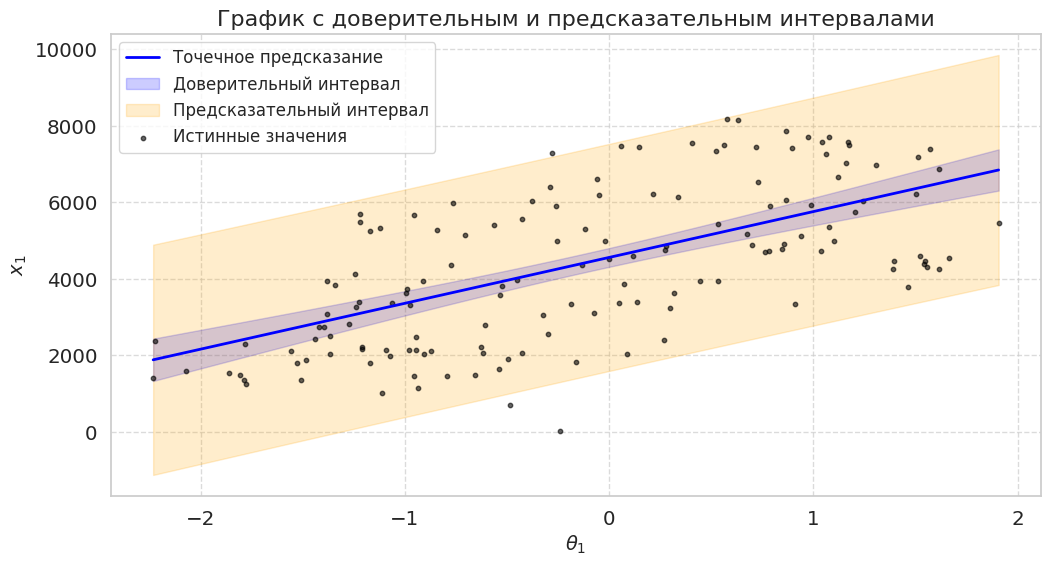

In [268]:
df_second["x"] = X_test[:, tmp_index]
df_second["y_true"] = y_test

df_sorted = df_second.sort_values(by="x").reset_index(drop=True)
plt.figure(figsize=(12, 6))

plt.plot(
    df_sorted["x"], df_sorted["Точечное предсказание"],
    label="Точечное предсказание", color="blue", linewidth=2
)

plt.fill_between(
    df_sorted["x"], df_sorted["Lower_Confidence"], df_sorted["Upper_Confidence"],
    color="blue", alpha=0.2, label="Доверительный интервал"
)

plt.fill_between(
    df_sorted["x"], df_sorted["Lower_Prediction"], df_sorted["Upper_Prediction"],
    color="orange", alpha=0.2, label="Предсказательный интервал"
)

plt.scatter(
    df_sorted["x"], df_sorted["y_true"], color="black", label="Истинные значения", alpha=0.6, s=10
)

plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$x_1$", fontsize=14)
plt.title("График с доверительным и предсказательным интервалами", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


**Выводы:**

Мы написали класс реализующий гауссовскую линейную регрессию. Подсчитали основные ее харатеристики.

Было получено, что при учете шума мы можем получить более корректную реализацию доверительныхт интервалов.

---
### Задача P2.

Рассмотрим два признака $x_1, x_2$ и целевую метку $y$.
Будем предполагать зависимость $y(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$.
Для проверки гипотезы о *не*значимости признака $x_2$, то есть $\mathsf{H}_0\colon \theta_2=0$, на практике широко используется $T$-критерий (например, в AB-тестировании), который мы получили в предположениях гауссовской линейной модели. Проведем его исследования.

**1.** Оцените вероятность ошибки I рода в предположениях гауссовской линейной модели, в частности, **при наличии гомоскедастичности**. Для этого повторите достаточное количество раз (не менее $10^4$) следующую процедуру и усредните результаты.
1. Сгенерируйте некоторым образом выборку размера 200 из признаков $x_1$ и $x_2$.
2. Сгенерируйте целевую метку в предположениях гауссовской линейной модели. В процедуре оценки вероятности ошибки I рода на данном этапе необходимо брать $\theta_2 = 0$, то есть генерировать данные при справедливости $\mathsf{H}_0$.
3. Примените критерий.
4. Проведя достаточное количество шагов 1-3, сделайте оценку вероятности ошибки I рода и постройте соответствующий доверительный интервал.

*Примечание.* Подобную процедуру мы уже делали в предыдущих заданиях, включая построение доверительного интервала.

*Важно:* распределение данных и шума должно быть одинаковым в каждом эксперименте!

*Совет.* Используйте `tqdm` в циклах. Производите отладку кода на малом количестве итераций.

In [269]:
def simulate_linear_regression(distr, num_of_experiments, size_sample, alpha):
    theta = np.array([1, 1, 0])
    results = []
    for _ in tqdm(range(num_of_experiments)):
        lin_reg = LinearRegression(fit_intercept=False)
        epsilon = sps.norm.rvs(size=size_sample)

        sample = distr.rvs(size=(size_sample, 2))
        sample = np.hstack((np.ones((size_sample, 1)), sample))

        y = sample @ theta + epsilon
        lin_reg.fit(sample, y)
        t_pval = lin_reg.t_pvalue[2]
        results.append(t_pval <= alpha)

    return np.mean(results)


num_of_experiments = 10000
size_sample = 200
alpha = 0.05

probability_of_type_I_error = simulate_linear_regression(
    sps.norm, num_of_experiments, size_sample, alpha
)
print(f"Вероятность ошибки первого рода: {probability_of_type_I_error:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода: 0.051


Результаты могут сильно зависеть от того, как были сгенерированы данные для эксперимента. Для надежности повторите эксперимент, как-либо иначе сгенерировав признаки. Например, для генерации можно взять другое распределение признаков.

In [270]:
probability_of_type_I_error = simulate_linear_regression(
    sps.uniform(1, 2), num_of_experiments, size_sample, alpha
)
print(f"Вероятность ошибки первого рода: {probability_of_type_I_error:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода: 0.046


**2.** Повторите проведенные эксперименты **для случая гетероскедастичности**. Для этого сгенерируйте $\varepsilon_i$ из нормального распределения с дисперсией, зависящей от признаков. Например, в случае неотрицательных признаков можно взять $\mathsf{D} \varepsilon_i = \psi_0 + \psi_1 x_{i1} + \psi_2 x_{i2}$ для некоторых коэффициентов $\psi_j$.

В частности, исследуйте случаи
* $\psi_1\not=0, \psi_2=0$;
* $\psi_1=0, \psi_2\not=0$;
* $\psi_1\not=0, \psi_2\not=0$;


*Примечания.*
* Первые две ситуации разные, поскольку мы проводим исследование критериев проверки гипотезы о незначимости признака $x_2$.
* В данном случае мы применяем критерий при неверных предположениях модели, тем самым хотим исследовать поведение критерия при отклонениях от них.

1. $\psi_0 = 1, \psi_1 = 1, \psi_2 = 0$

In [271]:
def simulate_linear_regression_heteroscedasticity(
    distr, psi_arr, num_of_experiments, size_sample, alpha
):
    theta = np.array([1, 1, 0])
    results = []

    for _ in tqdm(range(num_of_experiments)):
        lin_reg = LinearRegression(fit_intercept=False)

        sample = distr.rvs(size=(size_sample, 2))
        sample = np.hstack((np.ones((size_sample, 1)), sample))

        scale = sample @ psi_arr
        epsilon = sps.norm(scale=scale).rvs(size=size_sample)

        y = sample @ theta + epsilon

        lin_reg.fit(sample, y)
        lin_reg.t_pvalue
        t_pval = lin_reg.t_pvalue[2]
        results.append(t_pval <= alpha)

    return np.mean(results)

psi_arr = np.array([1, 1, 0])
probability_of_type_I_error = simulate_linear_regression_heteroscedasticity(
    sps.poisson(2), psi_arr, num_of_experiments, size_sample, alpha
)
print(f"Вероятность ошибки первого рода: {probability_of_type_I_error:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода: 0.052


2. $\psi_0 = 1, \psi_1 = 0, \psi_2 = 1$

In [272]:
psi_arr = np.array([1, 0, 1])
probability_of_type_I_error = simulate_linear_regression_heteroscedasticity(
    sps.poisson(2), psi_arr, num_of_experiments, size_sample, alpha
)
print(f"Вероятность ошибки первого рода: {probability_of_type_I_error:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода: 0.161


3. $\psi_0 = 1, \psi_1 = 1, \psi_2 = 1$

In [273]:
psi_arr = np.array([1, 1, 1])
probability_of_type_I_error = simulate_linear_regression_heteroscedasticity(
    sps.poisson(2), psi_arr, num_of_experiments, size_sample, alpha
)
print(f"Вероятность ошибки первого рода: {probability_of_type_I_error:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода: 0.108


**3.** Исследуйте, как меняется вероятность ошибки I рода при отклонении распределения шума от нормальности. В качестве распределения шума возьмите **распределение Стьюдента** с 1, 3, 5, 10 степенями свободы. Шум должен быть **гомоскедастичным**.

In [274]:
probability_of_type_I_error_t1_2 = simulate_linear_regression(
    sps.t(1), num_of_experiments, size_sample, alpha
)
probability_of_type_I_error_t1_3 = simulate_linear_regression(
    sps.t(3), num_of_experiments, size_sample, alpha
)
probability_of_type_I_error_t1_5 = simulate_linear_regression(
    sps.t(5), num_of_experiments, size_sample, alpha
)
probability_of_type_I_error_t1_10 = simulate_linear_regression(
    sps.t(10), num_of_experiments, size_sample, alpha
)

print(f"Вероятность ошибки первого рода t(1): {probability_of_type_I_error_t1_2:.3f}")
print(f"Вероятность ошибки первого рода t(3): {probability_of_type_I_error_t1_3:.3f}")
print(f"Вероятность ошибки первого рода t(5): {probability_of_type_I_error_t1_5:.3f}")
print(f"Вероятность ошибки первого рода t(10): {probability_of_type_I_error_t1_10:.3f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Вероятность ошибки первого рода t(1): 0.054
Вероятность ошибки первого рода t(3): 0.051
Вероятность ошибки первого рода t(5): 0.049
Вероятность ошибки первого рода t(10): 0.052


**4.** Оцените и визуализируйте мощность критерия в зависимости от истинного значения $\theta_2$. Для сравнения используйте гомоскедастичный шум из нормального распределения и распределения Стьюдента с рассмотренными ранее значениями степени свободы.

In [275]:
def T_stat(X, Y, true_theta, index_theta=2):
    n, d = X.shape
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    sigma_sq = 1 / (n - d) * (Y - X @ theta).T @ (Y - X @ theta)
    return np.abs(theta[index_theta] - true_theta) / np.sqrt(
        sigma_sq * (np.linalg.inv(X.T @ X)[index_theta, index_theta])
    )


def F_stat(X, Y, true_theta, index_theta=2):
    return T_stat(X, Y, true_theta, index_theta) ** 2


def power(X, Y, true_theta, index_theta=2):
    f_stat = F_stat(X, Y, true_theta, index_theta)
    return sps.f(1, X.shape[0] - X.shape[1]).cdf(f_stat)

In [276]:
theta_true_arr = np.linspace(-1, 1, 100)
degrees_of_freedom = [1, 3, 5, 10]  
power_values = {df: [] for df in degrees_of_freedom}
power_values["normal"] = []  

for df in degrees_of_freedom:
    for theta_true in tqdm(theta_true_arr, desc=f"Calculating power for df={df}"):
        tmp_power = []
        for _ in range(100):
            sample = sps.norm.rvs(size=(200, 3))  
            epsilon = sps.t(df).rvs(size=200)  
            theta = np.array([1, 1, 0])  
            y = sample @ theta + epsilon  
            tmp_power.append(power(sample, y, theta_true))
        power_values[df].append(np.mean(tmp_power))

for theta_true in tqdm(theta_true_arr, desc="Calculating power for normal distribution"):
    tmp_power = []
    for _ in range(50):
        sample = sps.norm().rvs(size=(200, 3)) 
        epsilon = sps.norm().rvs(size=200)  
        theta = np.array([1, 1, 0])  
        y = sample @ theta + epsilon  
        tmp_power.append(power(sample, y, theta_true))
    power_values["normal"].append(np.mean(tmp_power))


Calculating power for df=1:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating power for df=3:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating power for df=5:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating power for df=10:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating power for normal distribution:   0%|          | 0/100 [00:00<?, ?it/s]

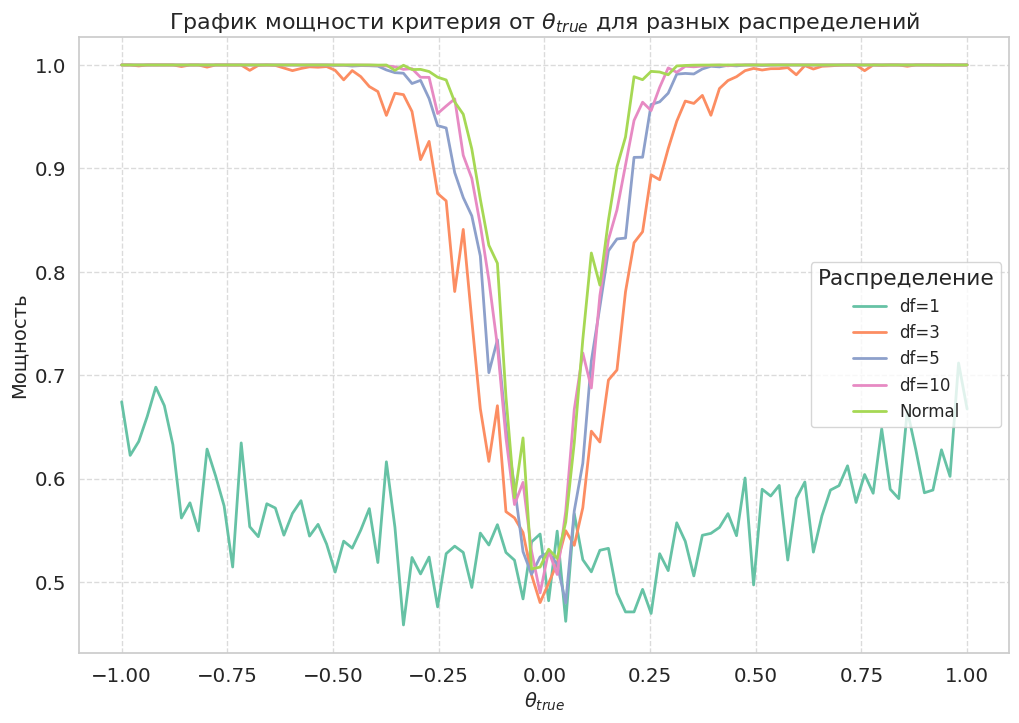

In [277]:
plt.figure(figsize=(12, 8))
for df, power_vals in power_values.items():
    if df == "normal":
        label = "Normal"
    else:
        label = f"df={df}"
    plt.plot(
        theta_true_arr, power_vals, label=label, linewidth=2
    )

plt.xlabel(r"$\theta_{true}$", fontsize=14)
plt.ylabel("Мощность", fontsize=14)
plt.title(r"График мощности критерия от $\theta_{true}$ для разных распределений", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Распределение", fontsize=12)
plt.show()


**Вывод:**

Увидели, что при гетероскедастичности мы не всегда можем поддерживать требуемую ошибку первого рода, в отличии от случая гомскедастичности. 

При помощи визуализации в конце убедилсь, что мощность критерия Стьюдента, с увеличением степеней свободы стремится к критерию для нормального распределения, что согласует с теорией о том, что $T_n \rightarrow N(0, 1)$